In [51]:
#Author: Walter Nam
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

In [52]:
class Data:
    
    def __init__(self, x_matrix, y):
        self.x_matrix = x_matrix
        self.y = y
    
    def add_bias(self, x_matrix):
        intercept = np.ones((x_matrix.shape[0], 1))
        return np.concatenate((intercept, x_matrix), axis=1)
    
    def polynomial_phi(self, x1, x2, degree):
        j = 0
        feature_list = []
        for i in range(1, degree + 1):
            for j in range(0, i + 1):
                feature_list.append(((x1**(i - j))*(x2**j)))
        return feature_list
        
    # data cannot be linearly classfied
    def plot_scatter(self, X, y):
        plt.figure(figsize=(10, 6))
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
        plt.legend();
        plt.show()
    
    # 1/(1 + exp(b0 + b1x1 + b2x2))
    def sigmoid(self, weighted_sum):
        return 1 / (1 + np.exp(-weighted_sum))
    
    # cross entropy loss function
    def cross_entropy(self, p, y):
        return (-y * np.log(p) - (1 - y) * np.log(1 - p)).mean()
    
    def batch_gradient_descent(self, phi, y, loss_array, eta, pmax):
        w0 = np.zeros(phi.shape[1])  # weights initialization
        for i in range(pmax): #optimizing the weights
            weighted_sum = np.dot(phi, w0)
            p = self.sigmoid(weighted_sum)
            gradient = np.dot(phi.T, (p - y)) / y.size 
            w0 -= eta * gradient
            weighted_sum = np.dot(phi, w0)
            p = self.sigmoid(weighted_sum)
            loss = self.cross_entropy(p, y)
            loss_array.append(loss)
        return loss_array, w0
    
    def regularized_gradient_descent(self, phi, y, loss_array, penalty, eta, pmax):
        w0 = np.zeros(phi.shape[1])  # weights initialization
        N = phi.shape[0]
        for i in range(pmax): #optimizing the weights
            weighted_sum = np.dot(phi, w0)
            p = self.sigmoid(weighted_sum)
            gradient = np.dot(phi.T, (p - y)) / y.size 
            w0 -= eta * gradient + (penalty/N)*w0
            reg_term = (penalty/2*N) * np.sum(np.matmul(w0[1:].T, w0[1:]))
            loss = self.cross_entropy(p, y) - reg_term
            loss_array.append(loss)
        return loss_array, w0
    
    def entropy_plot(self, loss_array, pmax):
        # plotting cross-entropy loss vs iterations
        x_range = range(1, pmax + 1)
        plt.plot(x_range, loss_array)
        plt.xlabel('# iterations')
        plt.ylabel('Cross-Entropy')
        plt.title('BGD Cost vs Pmax = 'f'{pmax}')
        
    def training_accuracy(self, phi, weights):
        weighted_sum = np.dot(phi, weights)
        p = self.sigmoid(weighted_sum)
        probability_list = []
        num_correct = 0
        for p in p:
            if p >= 0.50:
                probability_list.append(1)
                num_correct += 1
            else: 
                probability_list.append(0)
        print("Training Accuracy %")
        return num_correct/len(phi)

In [53]:
# load dataset
data = np.genfromtxt('data2.txt', delimiter = ',')
x_matrix =  data[:, :2]
y = data[:,2]

# create new Data object
model = Data(x_matrix, y)
phi = model.add_bias(model.x_matrix)
y = model.y
eta = 0.08
pmax = 10000
#model.plot_scatter(x_matrix, y)

Optimized Weights
[-0.01418412 -0.30352113 -0.01813178]
Training Accuracy %
0.4661016949152542


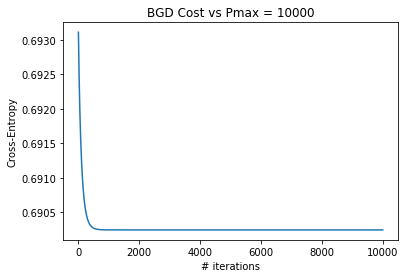

In [54]:
# plotting cross entropy vs iteration
loss_array = []
model.batch_gradient_descent(phi, y, loss_array, eta, pmax)
model.entropy_plot(loss_array, pmax)

optimized_weights = model.batch_gradient_descent(phi, y, loss_array, eta, pmax)[1]
print("Optimized Weights")
print(optimized_weights)
print(model.training_accuracy(phi, optimized_weights))

Optimized weights
[ 3.08101957  2.18211427  3.37749821 -4.84598615 -3.77281592 -4.5387385
  0.9260902  -1.41702817 -0.99985434 -0.27833977 -3.88941225  0.13429054
 -2.01423614 -1.38504729 -3.20164094 -0.54335066 -0.68891616  0.2714723
 -1.13974623 -1.34124711 -0.4028616  -3.02579645  0.27780377 -0.90783299
  0.20963601 -1.17268813 -0.97637599 -1.78427397]
Training Accuracy %
0.5169491525423728


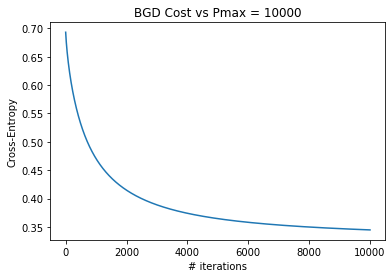

In [55]:
# Non-linear mapping logistic regression
x1 = data[:,0]
x2 = data[:,1]
bias = np.array([np.ones(118)])
degree = 6


# 28 x 118 matrix (27 + bias)
features = np.asarray(model.polynomial_phi(x1, x2, degree))
poly_phi = np.concatenate((bias, features), axis = 0).transpose()

# gradient descent with high dimensional phi
poly_loss_array = []
penalty = 0
model.regularized_gradient_descent(poly_phi, y, poly_loss_array, penalty, eta, pmax)
model.entropy_plot(poly_loss_array, pmax)

poly_optimized_weights = model.regularized_gradient_descent(poly_phi, y, poly_loss_array, penalty, eta, pmax)[1]
print("Optimized weights")
print(poly_optimized_weights)
print(model.training_accuracy(poly_phi, poly_optimized_weights))